We will introduce ideas for programming using a real life example. We will use Newton's second law of motion for the motion of a falling body in the air. From the free body diagram, a balance of forces tells us that the mass times the acceleration equals to the sum of forces acting on the body.
\begin{equation}
m a = \sum F
\end{equation}
where $m$ is the mass in kg, $a$ is the acceleration in m/s$^2$, and $F$ is a force acting on the body.

# Mathematical Model

The first step in any engineering formulation of a physics problem is to infer the mathematical description of the physical system.

So, what forces can we consider for a body falling in the air?

* weight ($ m g$)
* drag - due to air resistance

A popular form for drag is $F = c * u$ where $u$ is the speed of the falling body. Plugging everything in, we have
\begin{equation}
m a = mg - c u
\end{equation}

But that doesn't help us a lot: on the left handside we have the acceleration and on the right hand side we have the speed. Fortunately, they are related to each other via:
\begin{equation}
a = \frac{\text{d} u}{\text{d} t}
\end{equation}

So now, our mathematical physics model looks like
\begin{equation}
m \frac{\text{d} u}{\text{d} t} = m g - c u
\end{equation}
or, rearranging terms, we have
\begin{equation}
\frac{\text{d} u}{\text{d} t} = g - \tfrac{c}{m} u
\end{equation}



# Analytical Solution?

In many cases, an anlytical solution is available. In this case, the solution for the speed (or velocity) is
\begin{equation}
u(t) = (u_0 - \frac{m g}{c}) e^{-\frac{c}{m} t} + \frac{mg}{c}
\end{equation}
Here, $u_0$ is the initial speed with which the parachutist leaves the plane, and is usually 0.

Now let's do some predictions!

In [5]:
u0 = 0.0 # m/s
m = 60 # kg
c = 10 # drag coef (can you figure out the units? # hint: drag = force = c * u = Newtons)
g = 9.81 # m/s/s
t = 100000
u = (u0 - m*g/c)*math.exp(-c/m*t) + m*g/c
print(u)

NameError: name 'math' is not defined

It turns out that we need to tell Python where to get the exponential from. There is a module in python called math that you have to import

In [6]:
from math import exp
u0 = 0.0 # m/s
m = 60.0 # kg
c = 13.0 # drag coef (can you figure out the units? # hint: drag = force = c * u = Newtons)
g = 9.81 # m/s/s
t = 10
u = (u0 - m*g/c)*exp(-c/m*t) + m*g/c
print(u, 'm/s')

40.09005110968492 m/s


# Let's Create a Function

But this is really cumbersome: everytime we need to change a parameter, we have to type everything again.

Let's create a function instead that we can call everytime. Functions in Python can be define via def.

In [7]:
def fall_speed():
    u = (u0 - m*g/c)*exp(- c/m * t) + m*g/c
    return u

But this doesn't make sense! Can you tell me why?

It doesn't make sense because we haven't supplied any of the parameters to the function. The time t, the mass of the object, the gravitational acceleration, etc...

In [8]:
def fall_speed(m,c,t):
    g = 9.81
    u = (u0 - m*g/c)*exp(- c/m * t) + m*g/c
    return u

In [9]:
fall_speed(60,13,10)

40.09005110968492

# Seeing the Forest

We are still lost in the trees at the moment. We can't see the trends yet. Let's use the function that we defined to make a a plot!

To create a plot, we first should think what we are plotting vs what variable. In this case, the most natural thing is to plot the velocity $u$ as a function of time $t$.

For this, we will need a list of points that represent time.

In [10]:
t = [1,2,3,4]
exp(t)

TypeError: must be real number, not list

It turns out that the math module works for single values - not lists or arrays. To deal with arrays, we need numpy.

In [17]:
import numpy as np
np.exp(t)

array([ 2.71828183,  7.3890561 , 20.08553692, 54.59815003])

In [18]:
def fall_speed(m,c,t):
    g = 9.81
    u0 = 0
    u = (u0 - m*g/c)*np.exp(- c/m * t) + m*g/c
    return u

In [19]:
import matplotlib.pyplot as plt

In [20]:
plt.plot(t,fall_speed(60,12,t))

TypeError: can't multiply sequence by non-int of type 'float'

It turns out we can't multiply a list by a number c/m * t. We need something better than just a list. We need a numpy array.

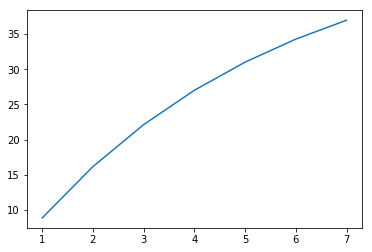

In [21]:
t = np.array([1,2,3,4,5,6,7])
plt.plot(t,fall_speed(60,12,t))

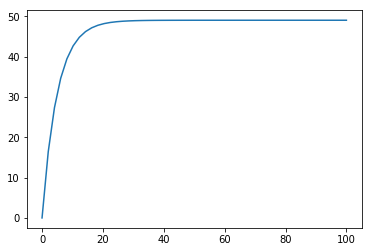

In [22]:
t = np.linspace(0,100)
plt.plot(t,fall_speed(60,12,t))

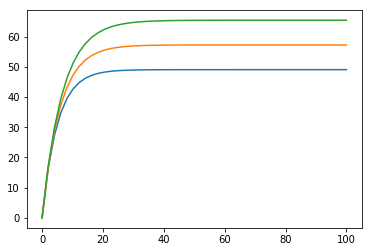

In [23]:
plt.plot(t,fall_speed(60,12,t))
plt.plot(t,fall_speed(70,12,t))
plt.plot(t,fall_speed(80,12,t))

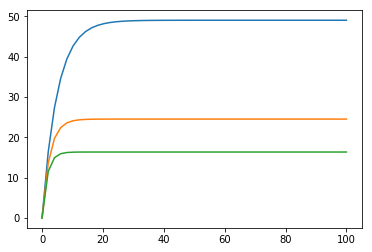

In [24]:
plt.plot(t,fall_speed(60,12,t))
plt.plot(t,fall_speed(60,24,t))
plt.plot(t,fall_speed(60,36,t))

# Solving this Numerically

We were very lucky this time to have an analytical solution. in the vast majority of cases, we do not have one. Say the drag model was more complex for example - then you would certainly need a numerical solution.

To solve this numerically, without even starting numerical methods, we are going to approximate the derivative term

\begin{equation}
\frac{\text{d} u}{\text{d} t} \approx \frac{\Delta u}{\Delta t} = \frac{u(t + \Delta t) - u(t)}{\Delta t}
\end{equation}

This gives us the formula
\begin{equation}
\frac{u(t + \Delta t) - u(t)}{\Delta t} = g - \tfrac{c}{m} u(t)
\end{equation}
or
\begin{equation}
u^{n+1} = u^n + \Delta t (g - \tfrac{c}{m} u^n)
\end{equation}



Now we have a sequence of number, starting with $u^0 = u(t=0)$, we have:

$u^0$ given

$u^1 = u^0 + \Delta t (g-\tfrac{c}{m}u^0)$

$u^2 = u^1 + \Delta t (g-\tfrac{c}{m}u^1)$

etc...

If you think we will write down every single one of those, then you're not thinking as a computer :)

The greatest thing about a sequence like this is that it can be repeated, as many times as you like! So let's create a loop for this.

In [40]:
m = 900.0 # kg
c = 13.0 # drag coef, kg/s
g = 9.81 # m/s/s, gravitational acceleration
u0 = 0.0 # initial condition, m/s

dt = 0.1 # timestep size, s
t = 0.0 # initial time
tend = 100 # end time - run the sequence until tend
uold = u0
while t < tend:
    unew = uold + dt * (g - c/m * uold)
    t = t + dt
    uold = unew
uexact = fall_speed(m,c,tend)
print('Numerical value:', unew, ' \n Exact value:', uexact)
print('absolute error =', abs(unew - uexact)*100,'%' )
print('relative error =', (unew - uexact)/uexact*100,'%' )

Numerical value: 519.355364651743  
 Exact value: 518.957018024558
absolute error = 39.8346627184992 %
relative error = 0.07675907895056958 %


Great! but wouldn't it be nice to plot the numerical solution?

Indeed. We can do this several ways, but for this example, we will simply save each value of the sequence into a list.

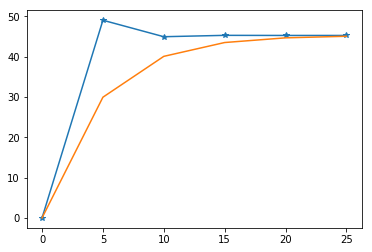

In [26]:
m = 60.0 # kg
c = 13.0 # drag coef, kg/s
g = 9.81 # m/s/s, gravitational acceleration
u0 = 0.0 # initial condition, m/s

dt = 5 # timestep size, s
t = 0.0 # initial time
tend = 30 # end time - run the sequence until tend
uold = u0

unumerical = []
tvals = []
while t < tend:
    tvals.append(t)
    unumerical.append(uold)
    unew = uold + dt * (g - c/m * uold)
    t = t + dt
    uold = unew
plt.plot(tvals, unumerical,'*-')
plt.plot(tvals, fall_speed(m,c,np.array(tvals)))